In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from tqdm import tqdm

In [2]:
def init():
    r = random.randint(0,2)
    liste = [0, 0, 0]
    liste[r]=1
    return liste

In [3]:
def choose_random():
    return random.randint(0,2)

In [4]:
def supp_door(liste, choix):
    zero = []
    for i in range(len(liste)):
        if liste[i] == 1:
            cadeau = i
        else:
            zero.append(i)
            
    
    supp = 0
    if cadeau == choix:
        supp = random.choice(zero)
    else:
        for j in zero:
            if j != choix:
                supp = j
                
    return supp

In [5]:
def change_door(liste , supp_door , choix):
    
    for i in range(len(liste)):
        if (i!=supp_door) and (i!=choix):
            return i
    

In [6]:
def verify(liste , final_choice):
    if liste[final_choice]==1:
        return 1
    else:
        return 0

In [7]:
def simu(n , verbose = True):
    stat_true_change = []
    stat_true_not_change = []
    for i in tqdm(range(n)):
        
        liste = init()
        porte_choisie = choose_random()
        porte_enlevee = supp_door(liste , porte_choisie)
        porte_final_changement = change_door(liste , porte_enlevee , porte_choisie)
        result_change = verify(liste , porte_final_changement)
        result_not_change = verify(liste , porte_choisie)
        
        stat_true_change.append(result_change)
        stat_true_not_change.append(result_not_change)
        
        if verbose:
            print(liste)
            print("la porte choisie est : " + str(porte_choisie + 1))
            print("la porte enlevée est : " + str(porte_enlevee + 1))
            print("la porte final est : " + str(porte_final_changement+1))
            print(result_change)
    
    sum_of_change = np.sum(stat_true_change)
    len_change = len(stat_true_change)
    
    sum_not_change = np.sum(stat_true_not_change)
    len_not_change = len(stat_true_not_change) 
            
    print("Lorsqu'on change de porte on obtient : " + str(sum_of_change) + " bons résultats pour : " + str(len_change) + " tests")
    print("le taux de réussite lorsqu'on change de porte est donc de : " + str(sum_of_change / len_change))
    
    plt.hist(stat_true_change, bins=[0,1,2])
    plt.title("histogramme des résultats avec changement de porte")
    plt.show()
    
    plt.pie([sum_of_change , len_change - sum_of_change] , labels = ["bonne pioche" , "erreurs"] ,autopct ='%1.1f%%', shadow = True , startangle = 90)
    plt.title("Taux de réussite avec changement de porte")
    plt.axis('equal')
    plt.show()
    
    print("Lorsqu'on ne change pas de porte on obtient : " + str(sum_not_change) + " bons résultats pour : " + str(len_not_change) + " tests")
    print("le taux de réussite lorsqu'on ne change pas de porte est donc de : " + str(sum_not_change / len_not_change))
    plt.hist(stat_true_not_change , bins=[0,1,2])
    plt.title("histogramme des résultats sans changement de porte")
    plt.show()
    
    plt.pie([sum_not_change , len_not_change - sum_not_change], labels = ["bonne pioche" , "erreurs"] ,autopct ='%1.1f%%', shadow = True , startangle=90)
    plt.title("Taux de réussite sans changement de porte")
    plt.axis('equal')
    plt.show()
    
    
    

100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:08<00:00, 113979.03it/s]


Lorsqu'on change de porte on obtient : 666316 bons résultats pour : 1000000 tests
le taux de réussite lorsqu'on change de porte est donc de : 0.666316


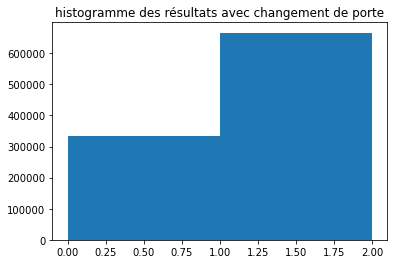

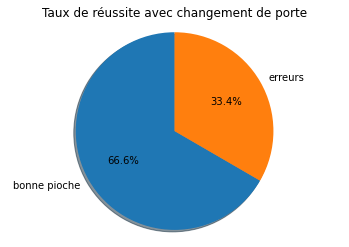

Lorsqu'on ne change pas de porte on obtient : 333684 bons résultats pour : 1000000 tests
le taux de réussite lorsqu'on ne change pas de porte est donc de : 0.333684


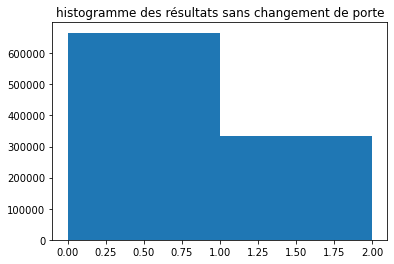

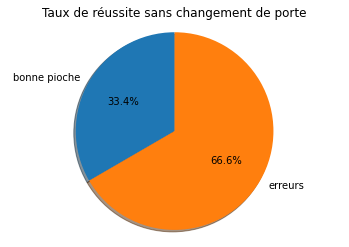

In [8]:
simu(1000000,False)